In [1]:
%reset -f
import sys
sys.path.insert(0, '..')
from wavhandler import *
import numpy as np
import matplotlib.pyplot as plt
from configs import *
from sklearn import preprocessing

In [2]:
data = DatasetConfiguration(names=['Melanogaster_RL'])
data.select_all()
data.read()
data.parse_filenames()

Dataset - Melanogaster_RL - exists: True


In [3]:
nrm_scores, psd, vals_l2 = get_clean_wingbeats_normalization(names=data.fnames.tolist(), norm='l2', include_mats=True)

## Melanogaster_RL

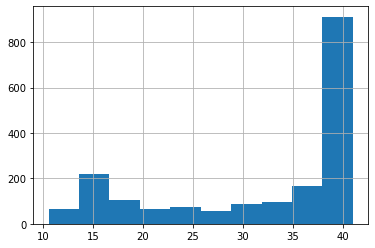

In [4]:
pd.Series(nrm_scores).hist()

In [5]:
data.df_info['nrm_scores'] = nrm_scores

In [10]:
selection = vals_l2[data.df_info[data.df_info['nrm_scores'] < 15].index.values]
df_slct = data.df_info[data.df_info['nrm_scores'] < 15]
print(df_slct.shape[0])

190


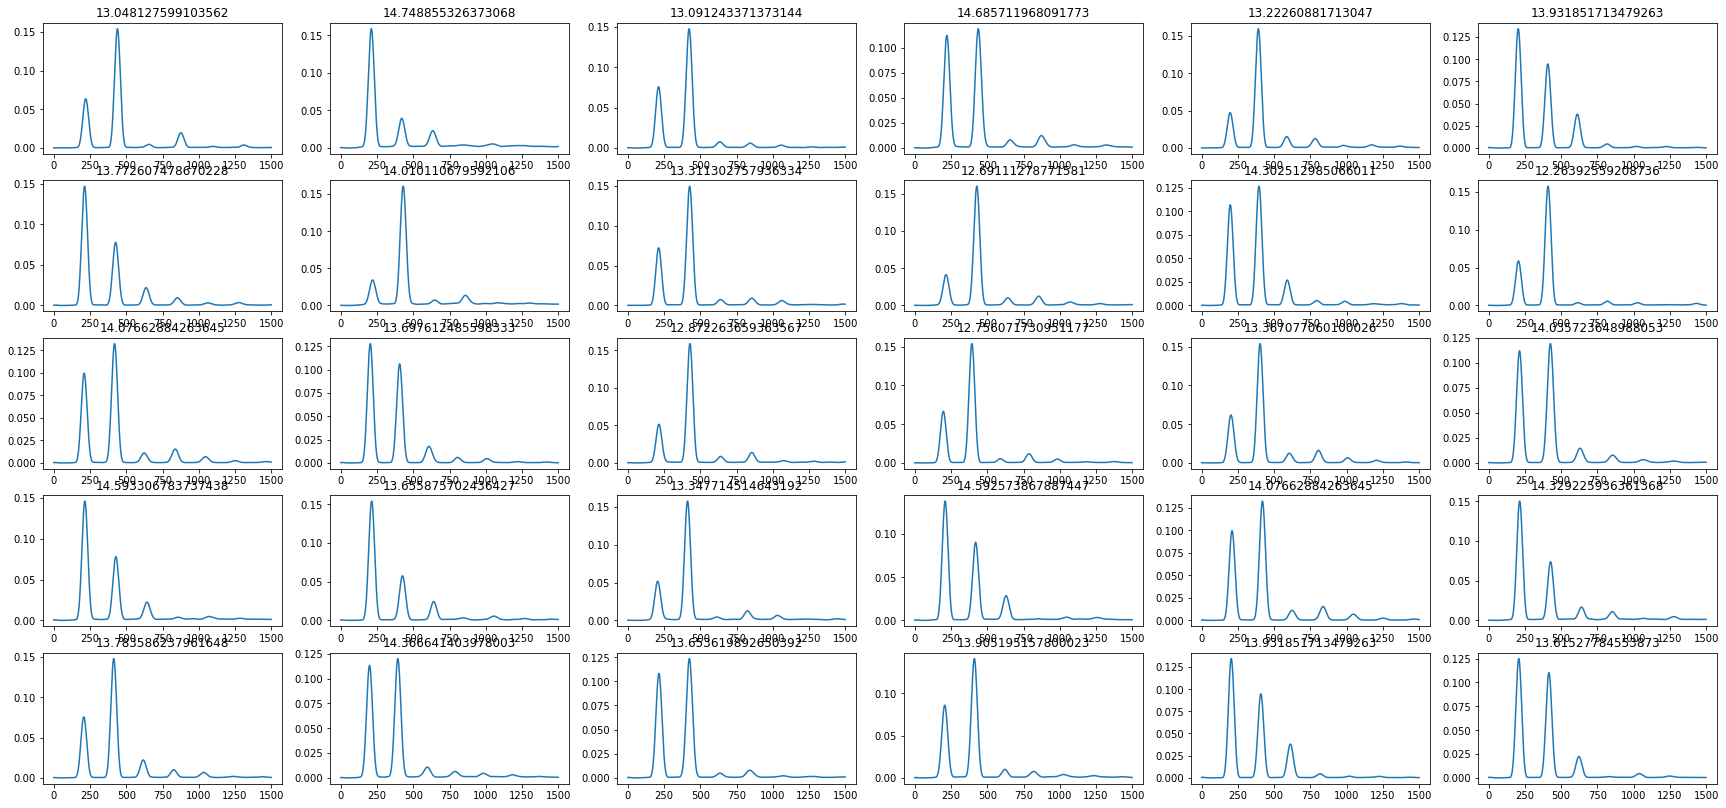

In [14]:
plt.close('all')
plt.figure(figsize=(30,14))
for i in range(30):
    rdm = random.randint(0,df_slct.shape[0])
    plt.subplot(5,6,i+1)
    plt.plot(selection[rdm,:1500])
    plt.title(df_slct.iloc[rdm].nrm_scores)

## LG

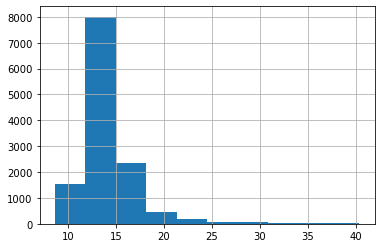

In [16]:
pd.Series(nrm_scores).hist()

## Thomas

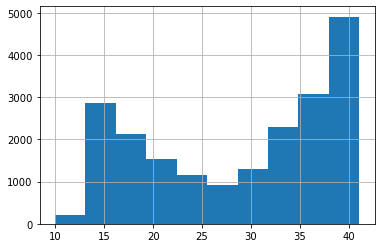

In [13]:
pd.Series(nrm_scores).hist()

## Rodrigo

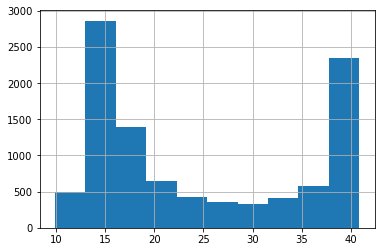

In [10]:
pd.Series(nrm_scores).hist()

In [24]:
data = DatasetConfiguration(names=['Thomas'])
data.select_all()
data.read()
data.parse_filenames()

Dataset - Thomas - exists: True


In [25]:
erg_scores = get_clean_wingbeats_ratio_psd_energy(names=data.fnames.tolist())

## Thomas

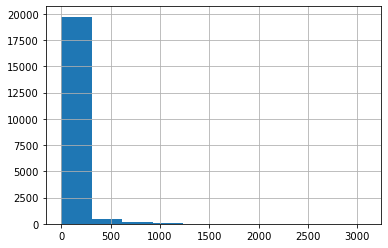

In [26]:
pd.Series(erg_scores).hist()

## Melanogaster_RL

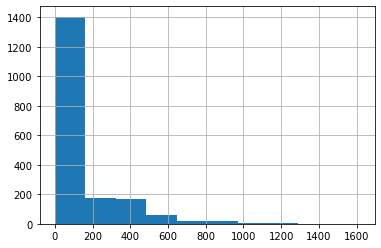

In [23]:
pd.Series(erg_scores).hist()

In [6]:
data.df_info['nrm_scores'] = nrm_scores
data.df_info['erg_scores'] = erg_scores

In [82]:
erg = data.df_info[data.df_info['erg_scores'] > 140]
nrm = data.df_info[data.df_info['nrm_scores']<25]
print(f"based on energy: {erg.shape[0]},\nbased on normalized psd: {nrm.shape[0]}")

based on energy: 20727,
based on normalized psd: 19970


In [83]:
idx_same = np.intersect1d(erg.index.values, nrm.index.values)
print(idx_same.shape)

(18081,)


In [84]:
idx_diff = np.setdiff1d(erg.index.values, nrm.index.values)
idx_diff.shape

(2646,)

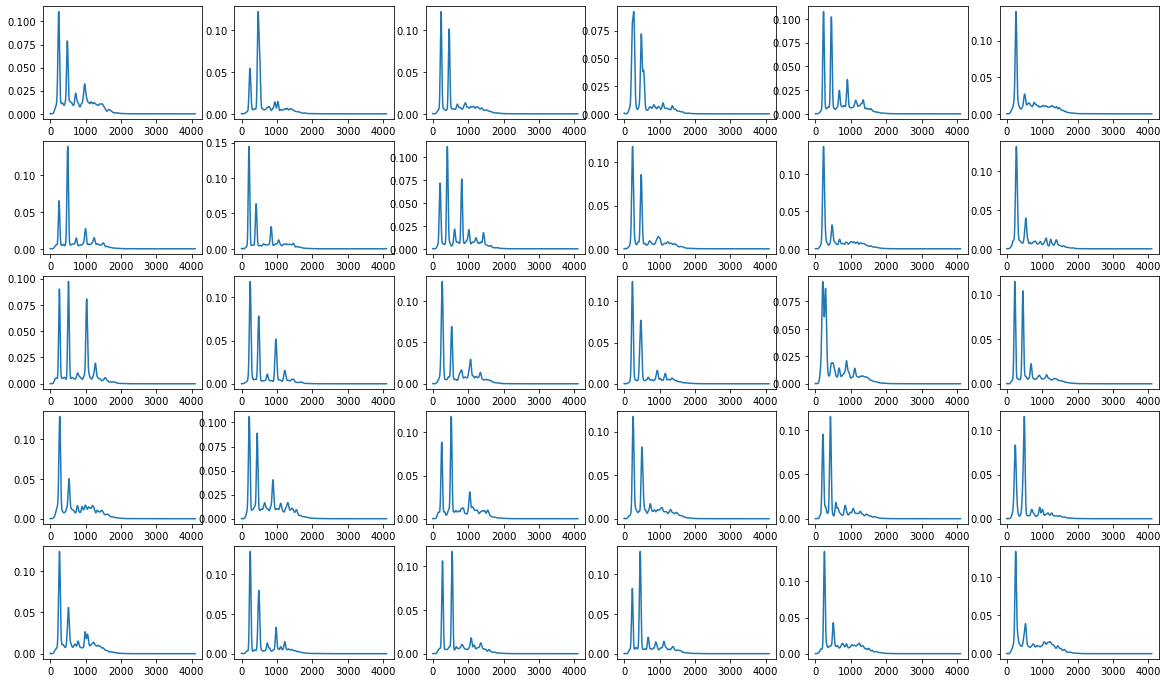

In [85]:
plt.figure(figsize=(20,12))
for i in range(30):
    rdm = np.random.randint(0,idx_diff.shape[0])
    plt.subplot(5,6,i+1)
    plt.plot(vals_l2[idx_diff][rdm,:])

In [17]:
vals_l1 = preprocessing.normalize(psd, norm='l1')

In [29]:
np.sum(vals_l1, axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [61]:
psd.values.min(axis=1).shape

(31073,)

In [131]:
a = (psd.values - psd.values.min(axis=1).reshape(-1,1)) 
b = (psd.values.max(axis=1) - psd.values.min(axis=1)).reshape(-1,1)
res = a/b

In [132]:
from sklearn.preprocessing import StandardScaler

In [168]:
sc = StandardScaler(with_std=False, with_mean=False)

In [169]:
res_sc = sc.fit_transform(psd.values)

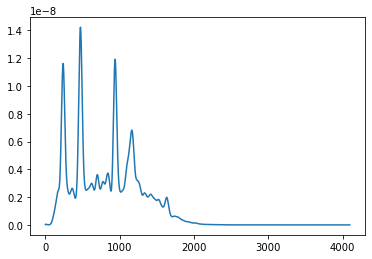

In [170]:
plt.plot(res_sc[5,:])

In [190]:
np.sum(vals[0,:])

1.0

In [158]:
psd = make_df_parallel(names=data.fnames.tolist(), setting='psdflt')

vals = preprocessing.normalize(psd.values, norm='l2')

In [299]:
np.sum(vals[0,:])

32.28108823825854

In [244]:
raw = make_df_parallel(names=data.fnames.tolist(), setting='rawflt')

15.510650851815488


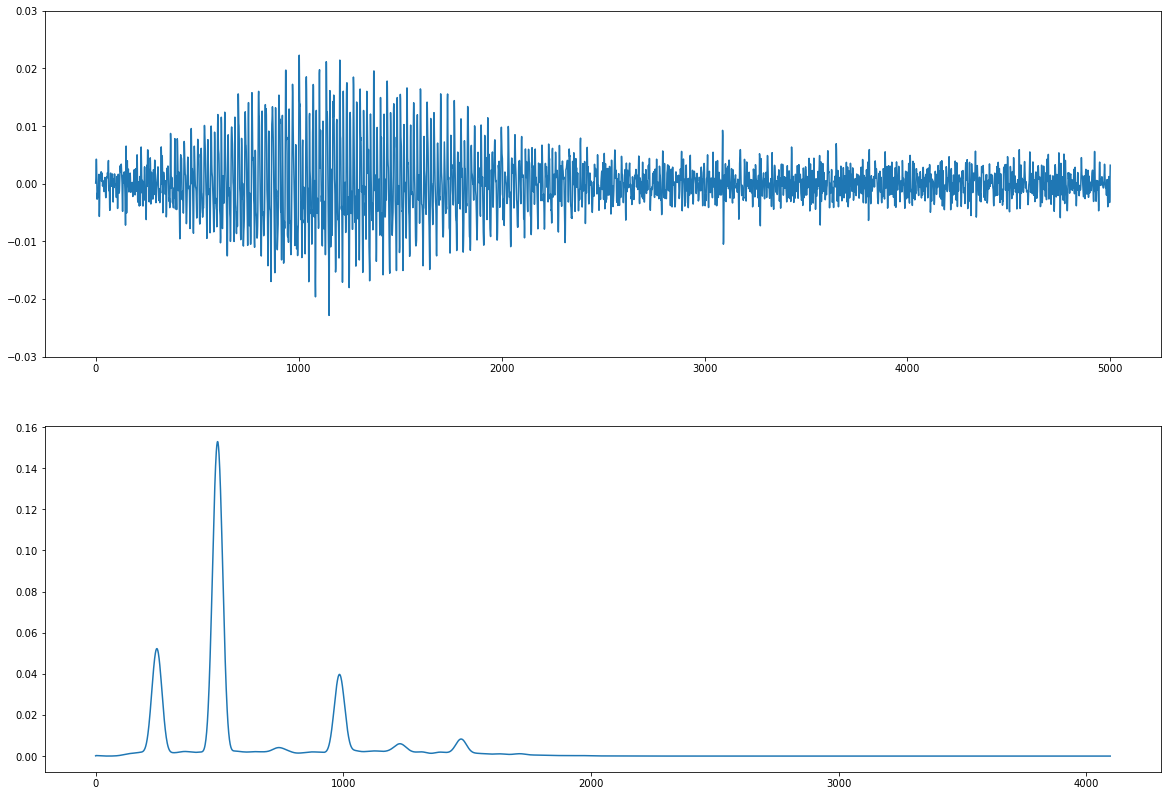

In [300]:
rdm = np.random.randint(0, data.fnames.shape[0])

plt.figure(figsize=(20,14))
plt.subplot(211);plt.plot(raw.values[rdm,:]); plt.ylim(-.03,.03)
plt.subplot(212);plt.plot(vals[rdm,:])
print(np.sum(vals[rdm,:]))

In [305]:
np.sum(vals, axis=1)[rdm]

15.510650851815488

In [140]:
preprocessing.normalize(sig.values.reshape(-1,1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

(0, 1e-06)

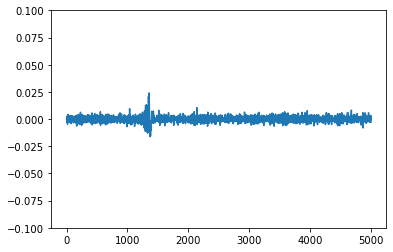

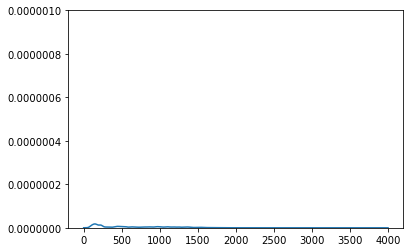

In [123]:
rdm = np.random.randint(0, data.fnames.shape[0])

# early = data.psd.iloc[rdm, 0:150].median()
# late = data.psd.iloc[rdm, 180:300].median()

import scipy.integrate as it
early = it.cumtrapz(psd.iloc[rdm, :100],initial=0)[-1]
late = it.cumtrapz(psd.iloc[rdm, 180:280],initial=0)[-1]
later = it.cumtrapz(psd.iloc[rdm, 1000:2000],initial=0)[-1]
whole = it.cumtrapz(psd.iloc[rdm,:],initial=0)[-1]

plt.figure()
raw.iloc[rdm].plot(ylim=(-.1,.1))
plt.figure()
psd.iloc[rdm,:].plot()
# plt.title(f"{late/early} rdm={rdm} later: {later/early}, whole: {whole}")
plt.ylim(0,10*1e-7)

In [13]:
it.cumtrapz(psd.iloc[rdm, 1000:],initial=0)[-1]

4.596811029685948e-06

In [162]:
data.fnames.iloc[1]

'/home/kalfasyan/data/insects/Mebios_RL/D.suzukiiR/D_20_07_16_11_45_24/F200716_134132_044_G_050_T_21.8_H_113.6.wav'

In [362]:
import scipy.integrate as it

c=0
for i in range(data.raw.shape[0]):
    early = it.cumtrapz(data.psd.iloc[i, :100])[-1]
    late = it.cumtrapz(data.psd.iloc[i, 200:300])[-1]
    metric = late/early 
    if metric > 0.109:
        c += 1

In [363]:
c

1328